<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.341834,49.590755,59.796114,53.930144,-2.292613,234.366235,235.860883,-1.494648
1,0.0,1.0,58.496793,90.575553,59.782022,47.014295,-0.103891,265.764773,265.822644,-0.057871
2,0.0,2.0,99.682210,85.958356,63.075759,86.051501,-0.293385,344.474442,345.455496,-0.981054
3,0.0,3.0,88.797004,82.128837,91.092657,22.750650,-1.493295,293.275852,294.413216,-1.137364
4,0.0,4.0,86.088363,91.289346,93.999808,54.747342,2.356020,338.480880,336.097527,2.383353
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,53.867114,35.774627,42.385180,71.445078,0.306114,213.778113,213.447690,0.330423
19996,999.0,16.0,40.642317,82.418838,73.462984,96.631482,1.706195,304.861817,303.515085,1.346731
19997,999.0,17.0,36.790980,95.954575,59.360859,60.470152,0.737504,263.314070,262.539435,0.774635
19998,999.0,18.0,51.618746,85.494923,46.537206,72.582533,0.444864,266.678272,266.399312,0.278960


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.341834  49.590755  59.796114  53.930144 -2.292613  234.366235   
      1.0    58.496793  90.575553  59.782022  47.014295 -0.103891  265.764773   
      2.0    99.682210  85.958356  63.075759  86.051501 -0.293385  344.474442   
      3.0    88.797004  82.128837  91.092657  22.750650 -1.493295  293.275852   
      4.0    86.088363  91.289346  93.999808  54.747342  2.356020  338.480880   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   53.867114  35.774627  42.385180  71.445078  0.306114  213.778113   
      16.0   40.642317  82.418838  73.462984  96.631482  1.706195  304.861817   
      17.0   36.790980  95.954575  59.360859  60.470152  0.737504  263.314070   
      18.0   51.618746  85.494923  46.537206  72.582533  0.444864  266.678272   
      19.0   90.834159  38.878028  36.555333  70.084472 -1.632548  244.719442   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.860883 -1.494648  
      1.0    265.822644 -0.057871  
      2.0    345.455496 -0.981054  
      3.0    294.413216 -1.137364  
      4.0    336.097527  2.383353  
...                 ...       ...  
999.0 15.0   213.447690  0.330423  
      16.0   303.515085  1.346731  
      17.0   262.539435  0.774635  
      18.0   266.399312  0.278960  
      19.0   246.409656 -1.690213  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.341834  49.590755  59.796114  53.930144 -2.292613  234.366235   
      1.0    58.496793  90.575553  59.782022  47.014295 -0.103891  265.764773   
      2.0    99.682210  85.958356  63.075759  86.051501 -0.293385  344.474442   
      3.0    88.797004  82.128837  91.092657  22.750650 -1.493295  293.275852   
      4.0    86.088363  91.289346  93.999808  54.747342  2.356020  338.480880   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   53.867114  35.774627  42.385180  71.445078  0.306114  213.778113   
      16.0   40.642317  82.418838  73.462984  96.631482  1.706195  304.861817   
      17.0   36.790980  95.954575  59.360859  60.470152  0.737504  263.314070   
      18.0   51.618746  85.494923  46.537206  72.582533  0.444864  266.678272   
      19.0   90.834159  38.878028  36.555333  70.084472 -1.632548  244.719442   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.860883 -1.494648  
      1.0    265.822644 -0.057871  
      2.0    345.455496 -0.981054  
      3.0    294.413216 -1.137364  
      4.0    336.097527  2.383353  
...                 ...       ...  
999.0 15.0   213.447690  0.330423  
      16.0   303.515085  1.346731  
      17.0   262.539435  0.774635  
      18.0   266.399312  0.278960  
      19.0   246.409656 -1.690213  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,63.341834,49.590755,59.796114,53.930144,-2.292613,234.366235,235.860883,-1.494648
1,0.0,1.0,58.496793,90.575553,59.782022,47.014295,-0.103891,265.764773,265.822644,-0.057871
2,0.0,2.0,99.682210,85.958356,63.075759,86.051501,-0.293385,344.474442,345.455496,-0.981054
3,0.0,3.0,88.797004,82.128837,91.092657,22.750650,-1.493295,293.275852,294.413216,-1.137364
4,0.0,4.0,86.088363,91.289346,93.999808,54.747342,2.356020,338.480880,336.097527,2.383353
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,53.867114,35.774627,42.385180,71.445078,0.306114,213.778113,213.447690,0.330423
19996,999.0,16.0,40.642317,82.418838,73.462984,96.631482,1.706195,304.861817,303.515085,1.346731
19997,999.0,17.0,36.790980,95.954575,59.360859,60.470152,0.737504,263.314070,262.539435,0.774635
19998,999.0,18.0,51.618746,85.494923,46.537206,72.582533,0.444864,266.678272,266.399312,0.278960


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    63.341834  49.590755  59.796114  53.930144 -2.292613  234.366235   
      1.0    58.496793  90.575553  59.782022  47.014295 -0.103891  265.764773   
      2.0    99.682210  85.958356  63.075759  86.051501 -0.293385  344.474442   
      3.0    88.797004  82.128837  91.092657  22.750650 -1.493295  293.275852   
      4.0    86.088363  91.289346  93.999808  54.747342  2.356020  338.480880   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   53.867114  35.774627  42.385180  71.445078  0.306114  213.778113   
      16.0   40.642317  82.418838  73.462984  96.631482  1.706195  304.861817   
      17.0   36.790980  95.954575  59.360859  60.470152  0.737504  263.314070   
      18.0   51.618746  85.494923  46.537206  72.582533  0.444864  266.678272   
      19.0   90.834159  38.878028  36.555333  70.084472 -1.632548  244.719442   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    235.860883 -1.494648  
      1.0    265.822644 -0.057871  
      2.0    345.455496 -0.981054  
      3.0    294.413216 -1.137364  
      4.0    336.097527  2.383353  
...                 ...       ...  
999.0 15.0   213.447690  0.330423  
      16.0   303.515085  1.346731  
      17.0   262.539435  0.774635  
      18.0   266.399312  0.278960  
      19.0   246.409656 -1.690213  

[20000 rows x 8 columns]

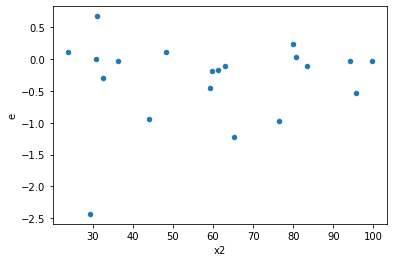

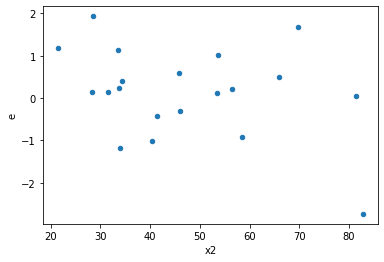

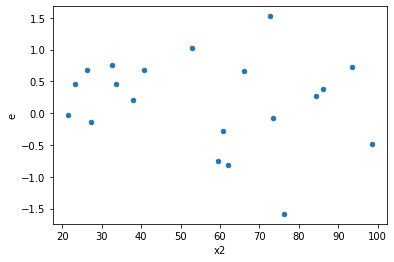

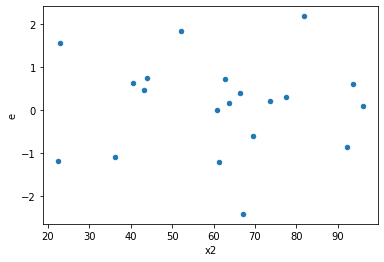

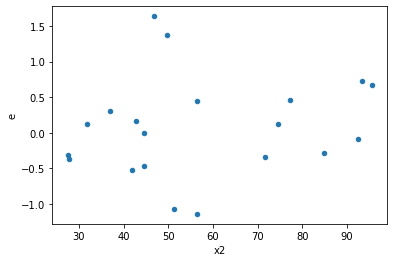

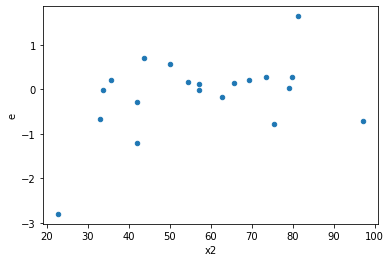

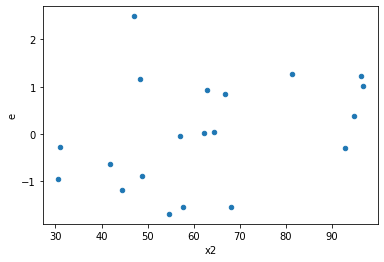

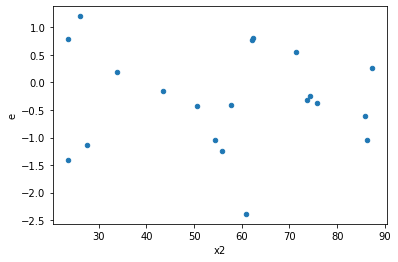

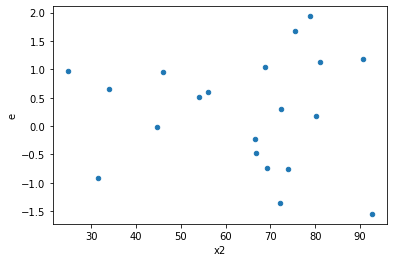

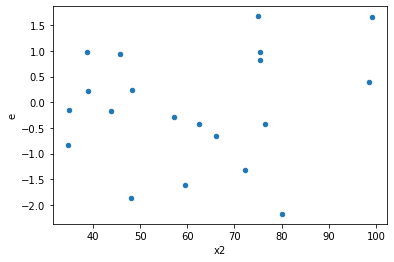

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,8.0,1.4871196977949546,15.343065813700342,0.37177992444873864,1.9178832267125427,5.158651935163816,0.047307851964772496,0.9763460740176138,0.023653925982386248,Reject005=0 : Heteroscedasticity
4.0,7.0,5.0,3.898357375827391,3.512563352785917,0.5569081965467702,0.7025126705571834,1.261451483230567,0.825792478336504,0.587103760831748,0.412896239168252,Reject005=1 : Homoscedasticity
5.0,5.0,7.0,3.8305392895262202,9.917022228892487,0.766107857905244,1.4167174612703552,1.8492402168332567,0.44398296604641874,0.7780085169767906,0.22199148302320937,Reject005=1 : Homoscedasticity
9.0,7.0,5.0,1.8784556639508274,2.079982031161362,0.2683508091358325,0.4159964062322724,1.5501962061225067,0.6505510990585304,0.6747244504707348,0.3252755495292652,Reject005=1 : Homoscedasticity
10.0,8.0,4.0,1.7952991663741387,3.0819632512965627,0.22441239579676733,0.7704908128241407,3.43337011348479,0.2485818055914517,0.8757090972042741,0.12429090279572585,Reject005=1 : Homoscedasticity
11.0,4.0,8.0,2.836100176937905,6.689043328030949,0.7090250442344762,0.8361304160038686,1.1792678168464785,0.7779294250467439,0.611035287476628,0.38896471252337195,Reject005=1 : Homoscedasticity
13.0,7.0,5.0,5.700366576717123,4.658286617811059,0.8143380823881604,0.9316573235622118,1.1440669958968348,0.9137339469219128,0.5431330265390436,0.4568669734609564,Reject005=1 : Homoscedasticity
24.0,5.0,7.0,3.656407711023536,6.455797547498935,0.7312815422047072,0.9222567924998478,1.261151470771952,0.751231932572964,0.624384033713518,0.375615966286482,Reject005=1 : Homoscedasticity
25.0,7.0,5.0,2.7535494798609537,5.444674486860727,0.39336421140870764,1.0889348973721453,2.768261234219744,0.2799893302213712,0.8600053348893144,0.1399946651106856,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,8.0,1.4871196977949546,15.343065813700342,0.37177992444873864,1.9178832267125427,5.158651935163816,0.047307851964772496,Reject005=0 : Heteroscedasticity
1.0,11.0,1.0,8.833178371849447,1.6802106192483375e-25,0.803016215622677,1.6802106192483375e-25,2.0923744583980335e-25,4.608858476026572e-131,Reject005=0 : Heteroscedasticity
2.0,11.0,1.0,14.039301491322842,7.108583389127582e-26,1.2763001355748038,7.108583389127582e-26,5.569680039190867e-26,3.177920117917049e-134,Reject005=0 : Heteroscedasticity
3.0,7.0,5.0,7.445370434146735,1.0992554119798392,1.0636243477352478,0.21985108239596785,0.20669993392318628,0.06239376684595953,Reject005=1 : Homoscedasticity
4.0,7.0,5.0,3.898357375827391,3.512563352785917,0.5569081965467702,0.7025126705571834,1.261451483230567,0.825792478336504,Reject005=1 : Homoscedasticity
5.0,5.0,7.0,3.8305392895262202,9.917022228892487,0.766107857905244,1.4167174612703552,1.8492402168332567,0.44398296604641874,Reject005=1 : Homoscedasticity
6.0,9.0,3.0,4.148316375146907,0.5231991321119345,0.4609240416829896,0.17439971070397817,0.37836974193662326,0.22598804094405886,Reject005=1 : Homoscedasticity
7.0,10.0,2.0,8.410850536418119,1.5329711820141356,0.8410850536418119,0.7664855910070678,0.9113056850651001,0.741622185613024,Reject005=1 : Homoscedasticity
8.0,10.0,2.0,6.510439241930552,0.00012103314194554805,0.6510439241930552,6.0516570972774027e-05,9.29531306935735e-05,4.3270422297785426e-17,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      728
Reject005=0 : Heteroscedasticity    272
Name: Result_test, dtype: int64